In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt

Metropolis Algorithm question 1

In [35]:
#boudary conditions
def bc_periodic(i, n): 
    return i % n

def bc_helical(i, j, n):
    if j>=n:
        new_i = (i-1)%n
        new_j = j%n
    elif j<0:
        new_i = (i+1)%n
        new_j = j%n
    else: 
        new_i = i%n
        new_j = j    
    return new_i, new_j

In [36]:
def generate_random_configuration(n):
    return [[random.choice([-1, 1]) for _ in range(n)] for _ in range(n)]

def calculate_energy(matrix, n):
    E = 0
    J = 1
    for i in range(n):
        for j in range(n):
            ni1, nj1 = bc_helical(i + 1, j, n)
            #ni2, nj2 = bc_helical(i - 1, j ,n)
            ni3, nj3 = bc_helical(i, j + 1, n)
            #ni4, nj4 = bc_helical(i, j - 1, n)
            energy_i = -J * matrix[i][j] * (
                matrix[ni1][nj1] +
                #matrix[ni2][nj2] +
                matrix[ni3][nj3]
                #matrix[ni4][nj4]
            )
            
            E += energy_i
    return E


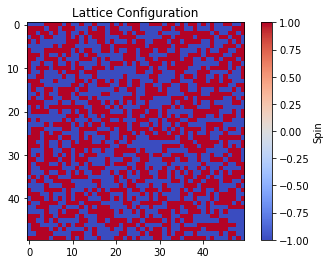

Percentage done: 0.00%
Percentage done: 0.00%
Percentage done: 0.00%
Percentage done: 0.01%
Percentage done: 0.01%
Percentage done: 0.01%
Percentage done: 0.01%
Percentage done: 0.01%
Percentage done: 0.02%
Percentage done: 0.02%
Percentage done: 0.02%
Percentage done: 0.02%
Percentage done: 0.02%
Percentage done: 0.03%
Percentage done: 0.03%
Percentage done: 0.03%
Percentage done: 0.03%
Percentage done: 0.03%
Percentage done: 0.04%
Percentage done: 0.04%
Percentage done: 0.04%
Percentage done: 0.04%
Percentage done: 0.04%
Percentage done: 0.05%
Percentage done: 0.05%
Percentage done: 0.05%
Percentage done: 0.05%
Percentage done: 0.05%
Percentage done: 0.06%
Percentage done: 0.06%
Percentage done: 0.06%
Percentage done: 0.06%
Percentage done: 0.06%
Percentage done: 0.07%
Percentage done: 0.07%
Percentage done: 0.07%
Percentage done: 0.07%
Percentage done: 0.07%
Percentage done: 0.08%
Percentage done: 0.08%
Percentage done: 0.08%
Percentage done: 0.08%
Percentage done: 0.08%
Percentage 

In [ ]:
n = 50
k = 5000000
T = 2

possible_delta_E = [np.exp(8 / T), 0, np.exp(4 / T), 0, np.exp(0 / T), 0, np.exp(-4 / T), 0, np.exp(-8 / T)]

def plot_lattice(matrix):
    plt.imshow(matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='Spin')
    plt.title('Lattice Configuration')
    plt.show()

def calculate_energy_single_spin(matrix, i, j, n, value):
    J = 1
    ni1, nj1 = bc_helical(i + 1, j, n)
    ni2, nj2 = bc_helical(i - 1, j, n)
    ni3, nj3 = bc_helical(i, j + 1, n)
    ni4, nj4 = bc_helical(i, j - 1, n)
    E = - J * value * (
        matrix[ni1][nj1] +
        matrix[ni2][nj2] +
        matrix[ni3][nj3] +
        matrix[ni4][nj4]
    )
    return E

def calculate_energy_change_on_single_spin(matrix, i, j, n):
    return calculate_energy_single_spin(matrix, i, j, n, -matrix[i][j]) - calculate_energy_single_spin(matrix, i, j, n, matrix[i][j])

# Calculate magnetization per spin
def magnetization_per_spin(matrix):
    return np.abs(np.sum(matrix)) / matrix.size

configuration = np.array(generate_random_configuration(n))
plot_lattice(configuration)
energy = calculate_energy(configuration, n)
energies =[]
magnetizations = []

# Pre-generate random indices and random numbers for the entire loop
random_indices = np.random.randint(0, n, size=(k, 2))
random_numbers = np.random.uniform(0, 1, size=k)

for idx in range(k):
    i, j = random_indices[idx]
    delta_E = calculate_energy_change_on_single_spin(configuration, i, j, n)
    if delta_E <= 0 or random_numbers[idx] <= possible_delta_E[int(delta_E/2 + 4)]:
        configuration[i][j] = -configuration[i][j]
        energy += delta_E
    energies.append(energy)
    magnetizations.append(magnetization_per_spin(configuration))
    if idx % 100 == 0:
        print(f"Percentage done: {(idx / k) * 100:.2f}%")

plt.plot(range(k), magnetizations)
plt.xlabel('Iteration')
plt.ylabel('Magnetization per spin')
plt.title('Magnetization vs Iterations')
plt.show()

# Plot the final lattice configuration
plot_lattice(configuration)

In [40]:
def m(T, J):
    return (1 - (np.sinh(2 * J / T)**(-4))) ** (1 / 8)

# Example usage
T = 2  # Example temperature
J = 1  # Example value for J
result = m(T, J)
print("m(T) =", result)

print("average magnetization per spin", np.mean(magnetizations))

m(T) = 0.911319377877496
average magnetization per spin 0.5990724935999997


In [41]:
#we take all the configurations after equilibration we estimate the time to equilibrium to be 0.05*10^7
equilibration_index = int(int(0.8*(10**6)))
post_equilibration_configurations = energies[equilibration_index:]

In [42]:
print(len(energies))
print(len(post_equilibration_configurations))

1000000
200000


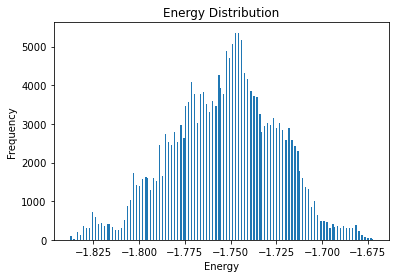

In [43]:
#plot the distribution of energies
normalized_energies = np.array(post_equilibration_configurations)/(n**2)
plt.hist(normalized_energies, bins=200)
plt.title('Energy Distribution')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.show()

For N = 50, calculate the autocorrelation function as a function of time, if
 the temperature is taken to be T = 22. Do this by iterating for a long time,
 and keep track of the magnetizations at each timestep (sweep). Normalize this
 autocorrelation function by dividing by (0).

Text(0.5, 1.0, 'Autocorrelation Function')

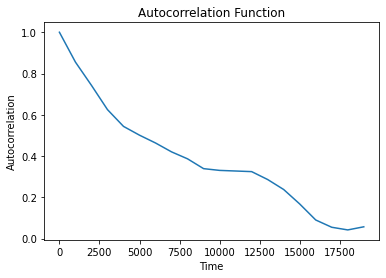

In [54]:
def autocorrelation(magnetization, t_eq, t_max, tau):
    m_eq = magnetization[t_eq:t_max]  # Discard pre-equilibration data
    m_mean = np.mean(m_eq)  # Compute equilibrium mean
    autocorrelations = []
    for i in range(len(m_eq) - tau):
        autocorrelation = (m_eq[i] - m_mean) * (m_eq[i + tau] - m_mean)
        autocorrelations.append(autocorrelation)
    return np.mean(autocorrelations)
    
    
N = 50  # Lattice size
t_eq = int(0.8*(10**6))  # Equilibration time
t_max = int(1* (10**6))  # Maximum time for autocorrelation calculation
autocorr= []
time = []
for x in range(20): 
    autocorr.append(autocorrelation(magnetizations, t_eq, t_max, x*1000)/autocorrelation(magnetizations, t_eq, t_max, 0))
    time.append(x*1000)

#plot autocorrelation function
plt.plot(time, autocorr)
plt.xlabel('Time')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')

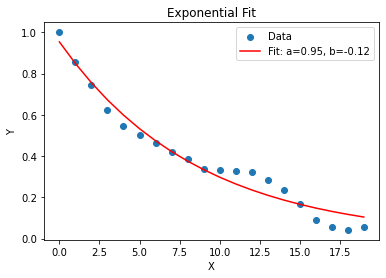

In [55]:
from scipy.optimize import curve_fit
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Step 3: Fit the exponential function to your data
params, covariance = curve_fit(exponential_func, range(20), autocorr)
a, b = params

# Step 4: Plot the data and the fitted exponential function
plt.scatter(range(20), autocorr, label='Data')
plt.plot(range(20), exponential_func(range(20), a, b), color='red', label=f'Fit: a={a:.2f}, b={b:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Exponential Fit')
plt.legend()
plt.show()

plt.show()